# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Google-page-rank" data-toc-modified-id="Google-page-rank-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Google page rank</a></div><div class="lev1 toc-item"><a href="#ランクの計算手順" data-toc-modified-id="ランクの計算手順-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ランクの計算手順</a></div><div class="lev1 toc-item"><a href="#演習" data-toc-modified-id="演習-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>演習</a></div><div class="lev2 toc-item"><a href="#Page-Rankの手順の確認" data-toc-modified-id="Page-Rankの手順の確認-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Page Rankの手順の確認</a></div><div class="lev3 toc-item"><a href="#ヒント" data-toc-modified-id="ヒント-311"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>ヒント</a></div><div class="lev3 toc-item"><a href="#解答例" data-toc-modified-id="解答例-312"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>解答例</a></div><div class="lev2 toc-item"><a href="#初期ベクトルがちがうと..." data-toc-modified-id="初期ベクトルがちがうと...-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>初期ベクトルがちがうと...</a></div><div class="lev3 toc-item"><a href="#解答例" data-toc-modified-id="解答例-321"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>解答例</a></div><div class="lev2 toc-item"><a href="#固有ベクトルから確認" data-toc-modified-id="固有ベクトルから確認-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>固有ベクトルから確認</a></div><div class="lev3 toc-item"><a href="#解答例" data-toc-modified-id="解答例-331"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>解答例</a></div>

<br />

<div style="text-align: center;">
<font size="5">数式処理group work-4(Google page rank)</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/~/python/doing_math_with_python/group_works_4.ipynb</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2009-2018  </font>
</div> 



# Google page rank<a id="sec-2" name="sec-2"></a>

Googleのpage rankは非常に単純な仮定
>「多くの良質なページからリンクされているページはやはり良質なページである」

から成り立っている．博士論文のテーマを探していたスタンフォード大学院コンピュータサイエンス学部時代のラリー・ペイジ(Larry Page)が考案しました．

> 『そのアルゴリズムはペイジの名をとって「ページランク(Page Rank)」と呼ばれたが，
> 特定のサイトに入るリンクの数と，リンクしたサイトのそれぞれに入るリンクの数の，
> その両方を考慮に入れる．
> これは学術論文の引用の度数計算の方法を手本にしており、予想通りに機能した』
> (『ザ・サーチ　グーグルが世界を変えた』ジョン・バッテル著、中谷和男訳,2005年日経BP社)　

詳しい解説はhttp://ja.wikipedia.org/wiki/ページランク
にある．

# ランクの計算手順

つぎのようなリンクが張られたページ群を考える．
![](../figs/page_rank_sample.png)

まずは，リンクを再現する隣接行列を作る．ページに番号をつけて，その間が結ばれている$i-j$要素を1，そうでない要素を0とする．
上の例では，
```
1 2 3 4 5 6 7
---
0 1 1 1 1 0 1
1 0 0 0 0 0 0
1 1 0 0 0 0 0
0 1 1 0 1 0 0
1 0 1 1 0 1 0
1 0 0 0 1 0 0
0 0 0 0 1 0 0
```
となる．
2.  この隣接行列を転置する．これはページランクが「どれだけリンクしているか」ではなく，「どれだけリンクされているか」を評価するためである．
3.  転置した隣接行列tMのそれぞれの列ベクトルの総和が1となるように規格化して「推移確率行列」をつくる．（ヒント参照）
4.  初期ベクトルとして，すべての要素が同じ値で，足して1になるような長さ7の列ベクトルを用意する．
5.  初期ベクトルに何度か(例えば10回，あるいは収束するまで)推移確率行列を掛ける．この操作は，行列の最大固有値に属する固有ベクトルを見つけることに相当する．
6.  得られたベクトルの各要素が対応するページの得点とみなせ，得点順にランクが高くなる．

# 演習<a id="sec-3" name="sec-3"></a>

## Page Rankの手順の確認

うえの手順にしたがって，「推移確率行列(transition probability matrix)」trans_matを作り，初期ベクトル(init_v)に5回ほど作用させて数字の変化を観察せよ．ページランクはどうなるか．

### ヒント

手順２，３に於いて，和を取って規格化する代わりに，
以下のようにして作成した対角(diagonal)行列VAを，
転置した隣接行列tMに右からかければ推移確率行列が得られる．
``` python
> V = [1/5,1,1/2,1/3,1/4,1/2,1]
> diag(*V)
```

### ヒント
pythonでMatrixでvectorを作ろうとすると行ベクトルになります．
右から掛けるときには転置(transpose)操作が必要です．

### ヒント
はじめに
> init_printing()

をいれておくと，固有値ベクトルとかの表示が綺麗．

### 解答例

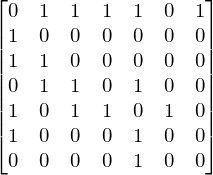

In [26]:
from sympy import *
init_printing()
M = Matrix([[0, 1, 1, 1, 1, 0, 1],
[1, 0, 0, 0, 0, 0, 0],
[1, 1, 0, 0, 0, 0, 0],
[0, 1, 1, 0, 1, 0, 0],
[1, 0, 1, 1, 0, 1, 0],
[1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0, 0]])
M

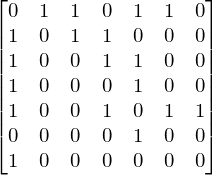

In [27]:
Mt = M.T
Mt

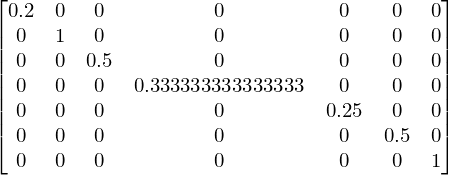

In [28]:
V = [1/5,1,1/2,1/3,1/4,1/2,1]
VA = diag(*V)
VA

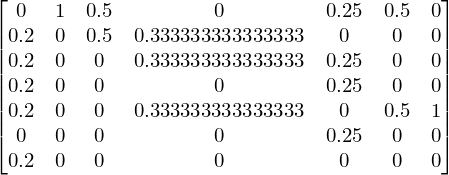

In [29]:
trans_mat = Mt*VA
trans_mat

In [30]:
v_init = Matrix([[1/7,1/7,1/7,1/7,1/7,1/7,1/7]])
v_init.shape

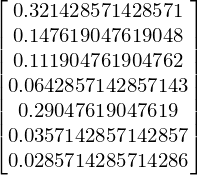

In [31]:
trans_mat* v_init.T

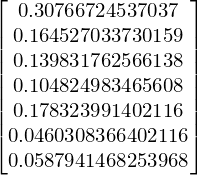

In [32]:
trans_mat* trans_mat* trans_mat* trans_mat* trans_mat* trans_mat* v_init.T

ページランクは1->5->2->3->4->7->6となる

## 初期ベクトルがちがうと...<a id="sec-3-2" name="sec-3-2"></a>

初期ベクトルを
``` python
> v_init=Matrix([100,0,0,0,0,0,0])
```

として，推移確率行列に右から掛け，それに伴うベクトルの各要素の変化を観察し，前問と比較せよ．その結果から，推移確率行列を掛けることによってどのように状態が推移していくか，漸近していく様子を記述せよ．

### 解答例

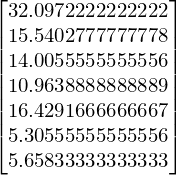

In [33]:
v_init=Matrix([100,0,0,0,0,0,0])
trans_mat * trans_mat * trans_mat * trans_mat * trans_mat * v_init

要素のそれぞれの値は初期値が違うので，異なっている．しかし，何度かかけた後のページランク(順位)は先ほどの等確率の初期値を使った場合と同じである．初期値がどうであろうと，つまりどこから入ったとしても，いくつかリンクをたどった後は同じサイトに行き着く．ステップを繰り返すと定常状態になることが期待される．これがPage Rankの値の安定性を保証し，ランクの信頼性につながっている．

## 固有ベクトルから確認<a id="sec-3-3" name="sec-3-3"></a>

推移確率行列の固有値・固有ベクトルをもとめ，最大固有値に対応する固有ベクトルを取り出せ．
前問までに得られた結果と比較し，一致していることを確かめよ．
ただし，固有ベクトルの大きさは任意であるため，norm()で規格化しておくと比較しやすい．

### 解答例

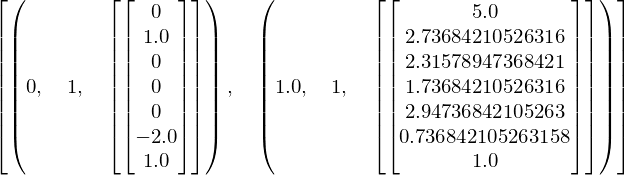

In [34]:
trans_mat.eigenvects()

In [35]:
v = Matrix(trans_mat.eigenvects()[1][2])

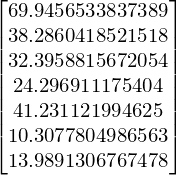

In [36]:
v/v.norm()*100

Page Rankが最大固有値の固有ベクトルと一致することが，どのような初期値であろうと最終状態のベクトルが安定することを保証している．この導出は，[la_eigen_vectors.ipynb](https://nbviewer.jupyter.org/github/daddygongon/jupyter_num_calc/blob/master/numerical_calc/la_eigen_vectors.ipynb)の4節に示した．